In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

In [2]:
df_porte_operadoras = pd.read_csv('../entrada/porte_operadoras.csv',encoding="ISO-8859-1")
df_cadu = pd.read_excel('../entrada/CADU.xls',encoding="ISO-8859-1")
df_cadop = pd.read_csv("../entrada/CooperativasMedicasAtivas_CADOP.txt",sep="\t",encoding="ISO-8859-1")


### FILTRANDO OPERADARAS ATIVAS DO ARQUIVO DE CADASTROS

In [3]:
df_cadu_operadoras  = df_cadu[(df_cadu["STATUS"] == "Ativo") & (df_cadu["TIPO DE ATUAÇÃO"] == 'OPERADORA')]

## INFORMAÇÕES RELEVANTES DO CONJUNTO DE DADOS

In [4]:
print("Quantidade de operadoras ativas:\t",df_cadu_operadoras['REGISTRO ANS'].count())
print("Total Beneficiários:\t\t\t",df_cadu_operadoras['QUANTIDADE DE BENEFICIÁRIOS'].sum())
print("Total Cooperados:\t\t\t",df_cadu_operadoras['COOPERADOS TOTAL'].sum())
print("Total de funcionários:\t\t\t",df_cadu_operadoras['QUANTIDADE DE FUNCIONÁRIOS'].sum())

Quantidade de operadoras ativas:	 283
Total Beneficiários:			 17955182
Total Cooperados:			 112090
Total de funcionários:			 101744


In [6]:
def gera_grafico_group_by(serie_valores,titulo) :
    
    fig = plt.figure(figsize=(18,20))
    gs = gridspec.GridSpec(9,1)
    
    ax1 = fig.add_subplot((gs[0:-3]))
    serie_valores.plot(kind='pie', y = "Classes", ax=ax1, autopct='%1.1f%%', 
    startangle=90,   legend = True, fontsize=16,)
    ax1.title.set_text(titulo)
    ax1.title.set_size(30)
    

    ax2 = fig.add_subplot((gs[7:]))
    serie_valores.plot(kind='bar',fontsize=16)
    ax2.title.set_text(titulo)
    ax2.title.set_size(30)

    #Ajuste das labels dos gráfico de barras
    for xticks in ax2.get_xticklabels():
        xticks.set_rotation(0)    

    rects = ax2.patches
    for rect, label in zip(rects, serie_valores.values):
        height = rect.get_height()
        ax2.text(rect.get_x() + rect.get_width() / 2, height, label,
                ha='center', va='bottom')
    plt.legend(loc='best',fontsize="small")
#     plt.tight_layout()
    plt.subplots_adjust(hspace = 0.5)
    nome_arquivo = titulo.replace(".","").replace(" ","_")
    plt.savefig("../graficos/"+nome_arquivo)
    plt.show()
    
    
   


## Quantidade de Operadoras por Porte

In [7]:
serie_quantidade_operadoras_por_porte = df_cadu_operadoras.groupby(by=['PORTE'])['REGISTRO ANS'].count()

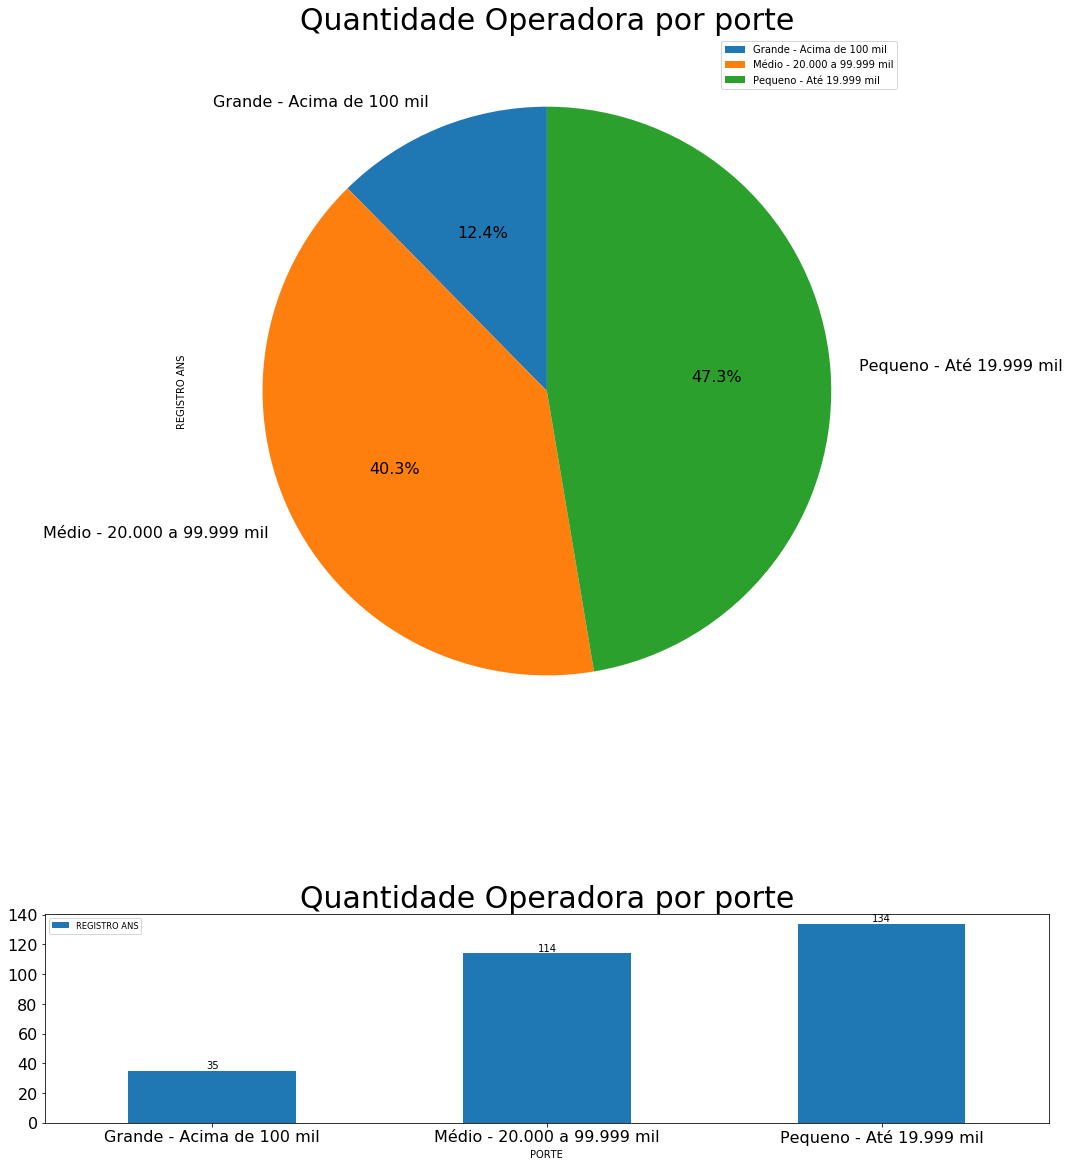

In [8]:
gera_grafico_group_by(serie_quantidade_operadoras_por_porte,"Quantidade Operadora por porte")

## Operadora por região

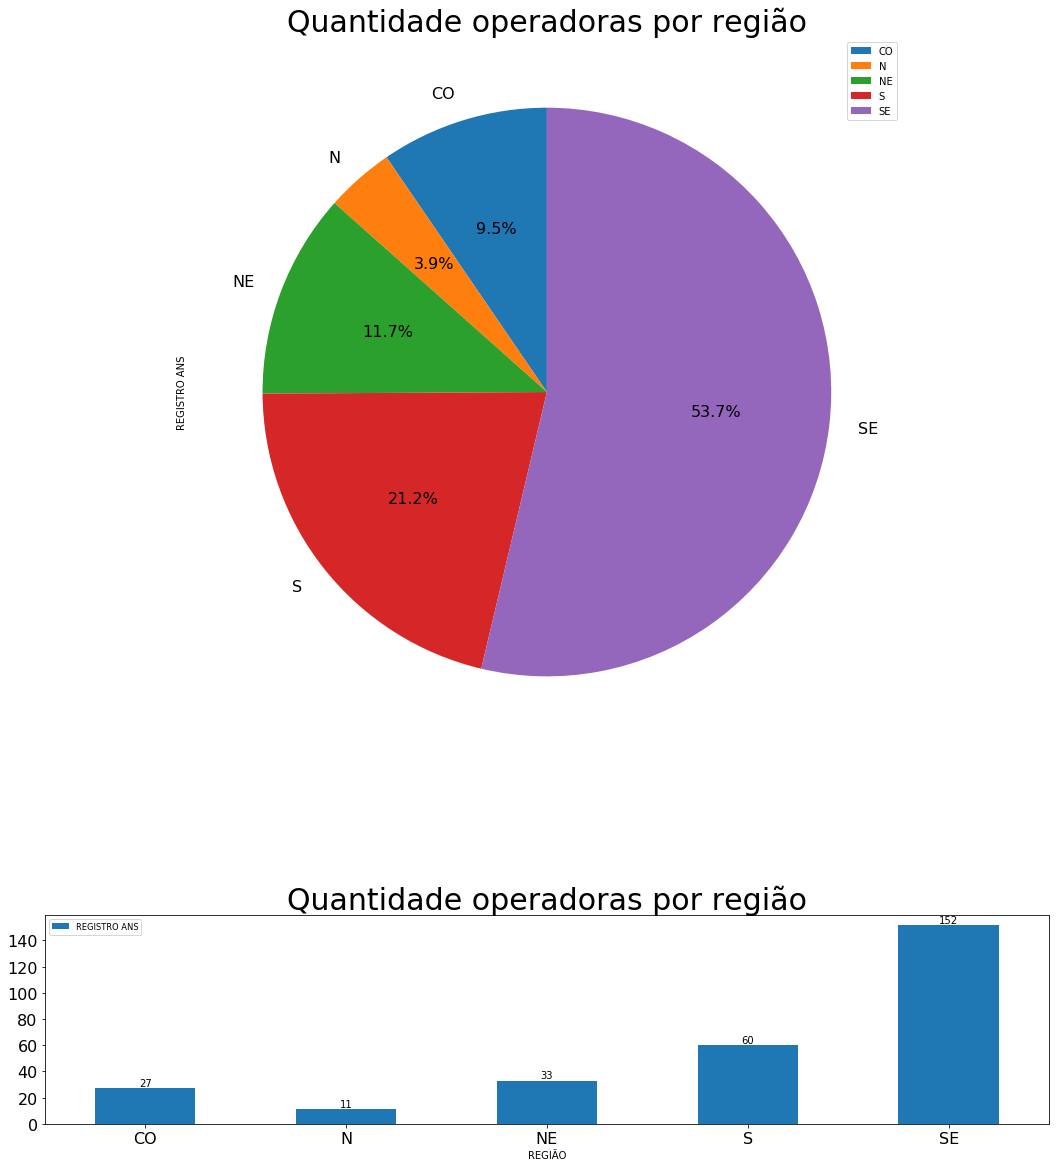

In [9]:
serie_quantidade_operadoras_por_regiao = df_cadu_operadoras.groupby(by=['REGIÃO'])['REGISTRO ANS'].count()
gera_grafico_group_by(serie_quantidade_operadoras_por_regiao,"Quantidade operadoras por região")

In [10]:
df_cadu.groupby(['PORTE','REGIÃO'])['REGISTRO ANS'].count()

PORTE                        REGIÃO
Grande - Acima de 100 mil    CO          3
                             N           1
                             NE          5
                             S          11
                             SE         15
Médio - 20.000 a 99.999 mil  CO          9
                             N           6
                             NE         13
                             S          27
                             SE         60
Não se Aplica                CO          5
                             N           2
                             NE         20
                             S           3
                             SE          6
Pequeno - Até 19.999 mil     CO         24
                             N           4
                             NE         35
                             S          36
                             SE        108
Name: REGISTRO ANS, dtype: int64

## Região por porte da operadora

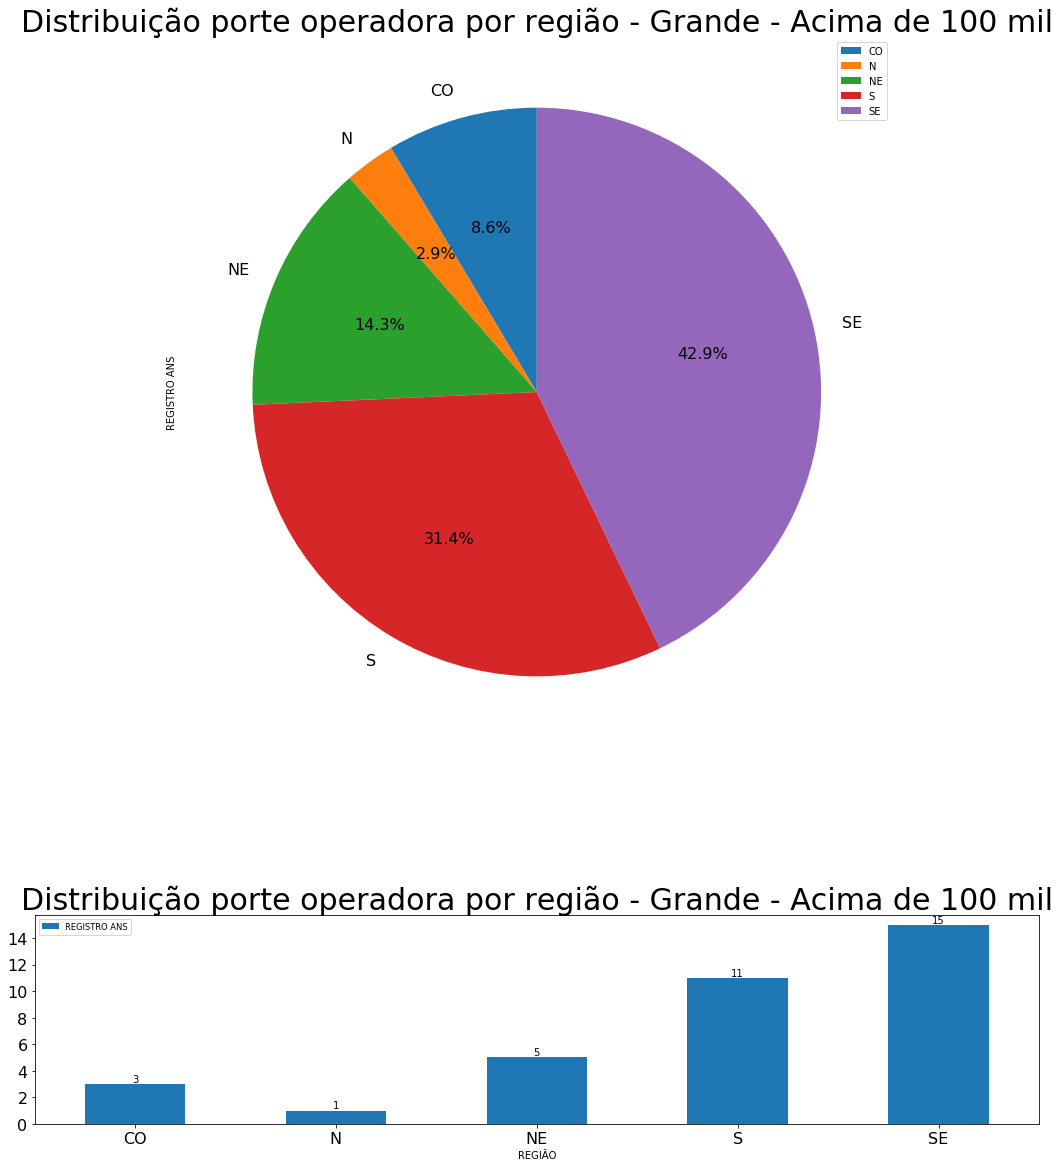

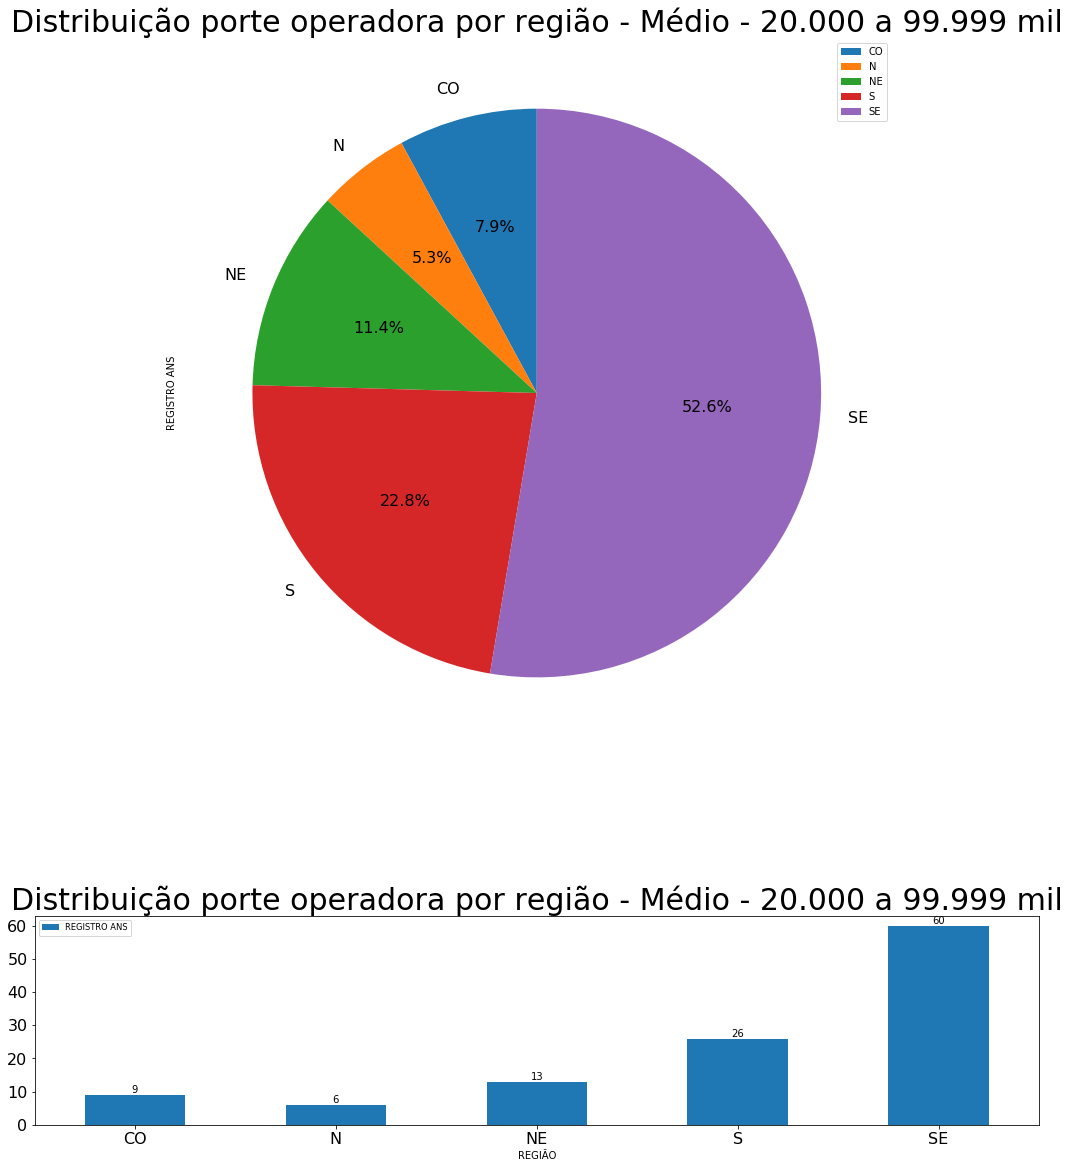

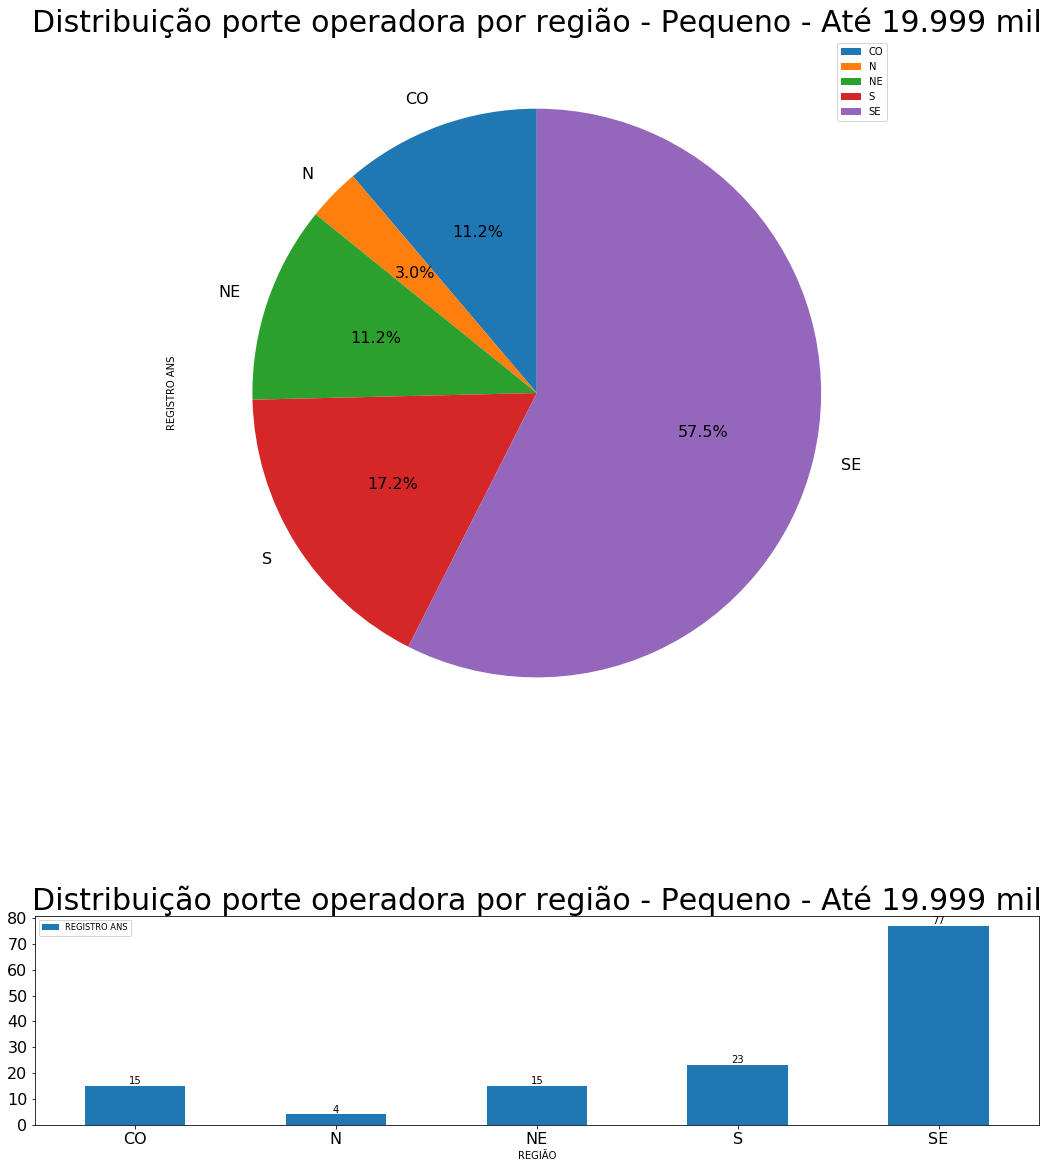

In [11]:
for porte in df_cadu_operadoras["PORTE"].unique():
    serie_porte_por_regiao = df_cadu_operadoras[df_cadu_operadoras["PORTE"] == porte].groupby(by=["REGIÃO"])['REGISTRO ANS'].count()
    gera_grafico_group_by(serie_porte_por_regiao, "Distribuição porte operadora por região - "+porte)

## Beneficiários das operadoras por região 

In [12]:
serie_quantidade_beneficiarios_por_regiao =  df_cadu_operadoras.groupby(by=['REGIÃO'])['QUANTIDADE DE BENEFICIÁRIOS'].sum()

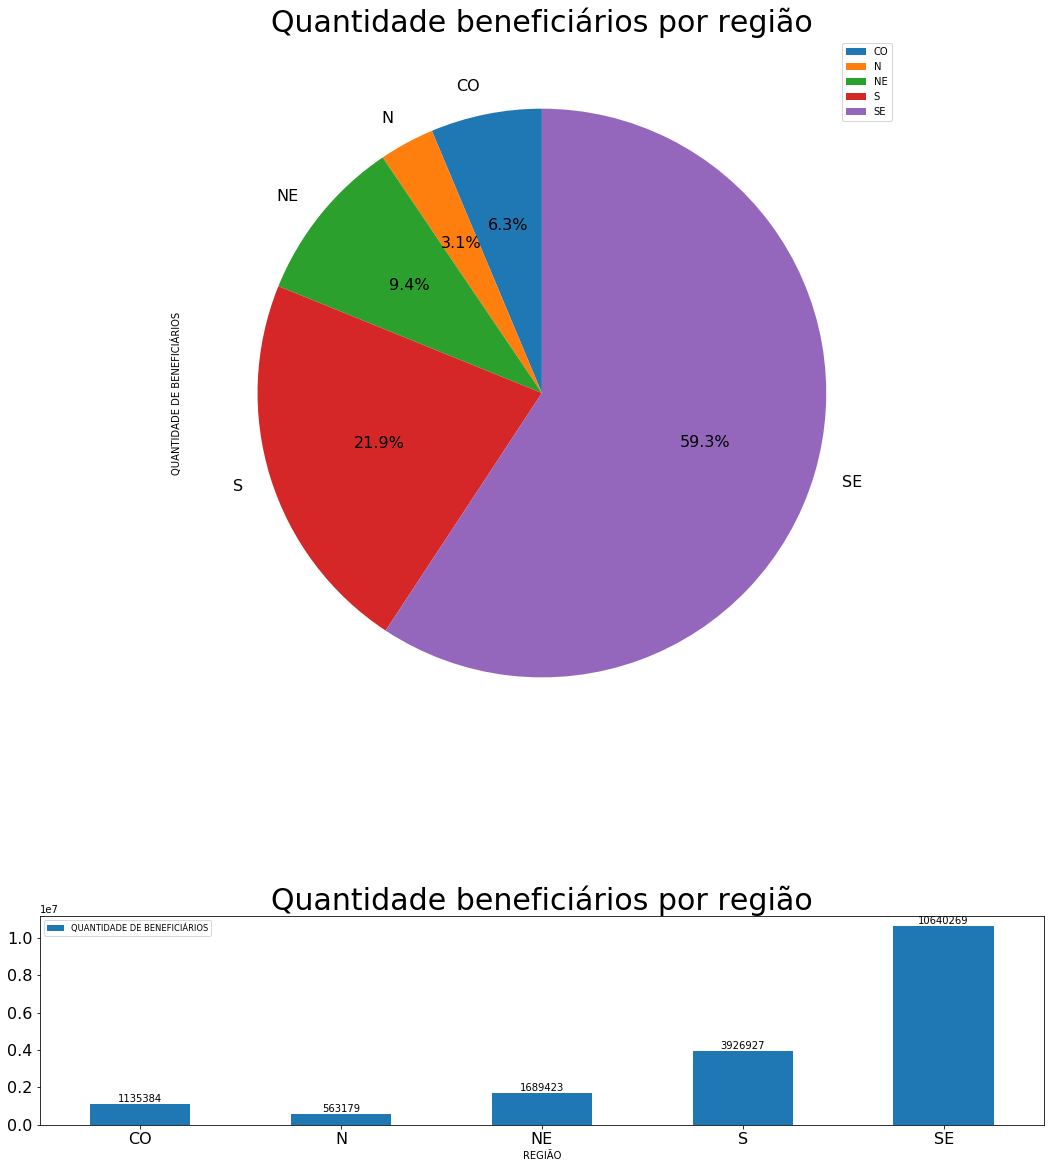

In [13]:
gera_grafico_group_by(serie_quantidade_beneficiarios_por_regiao, "Quantidade beneficiários por região")

## Porte Operadoras por Região

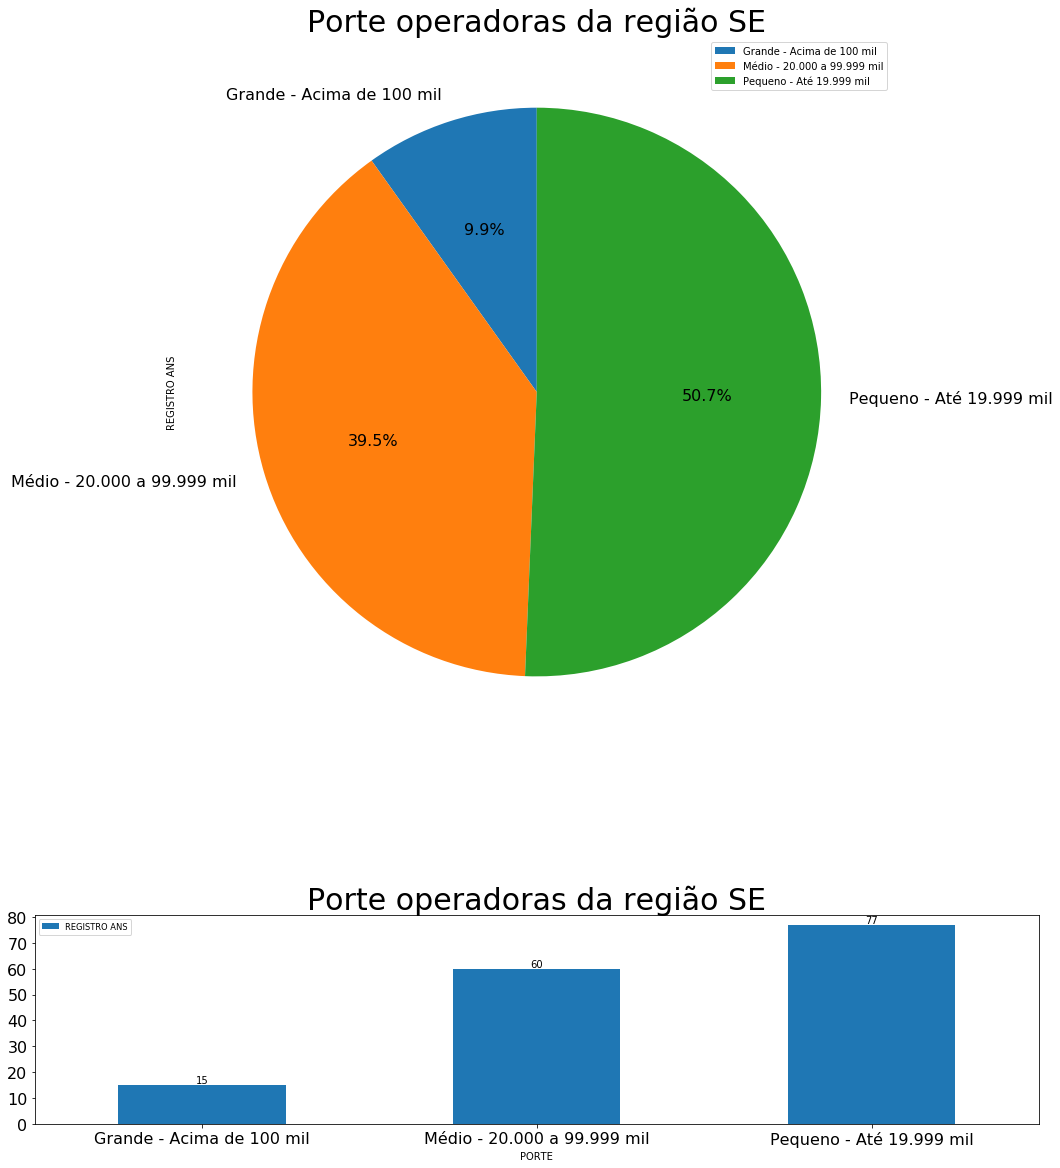

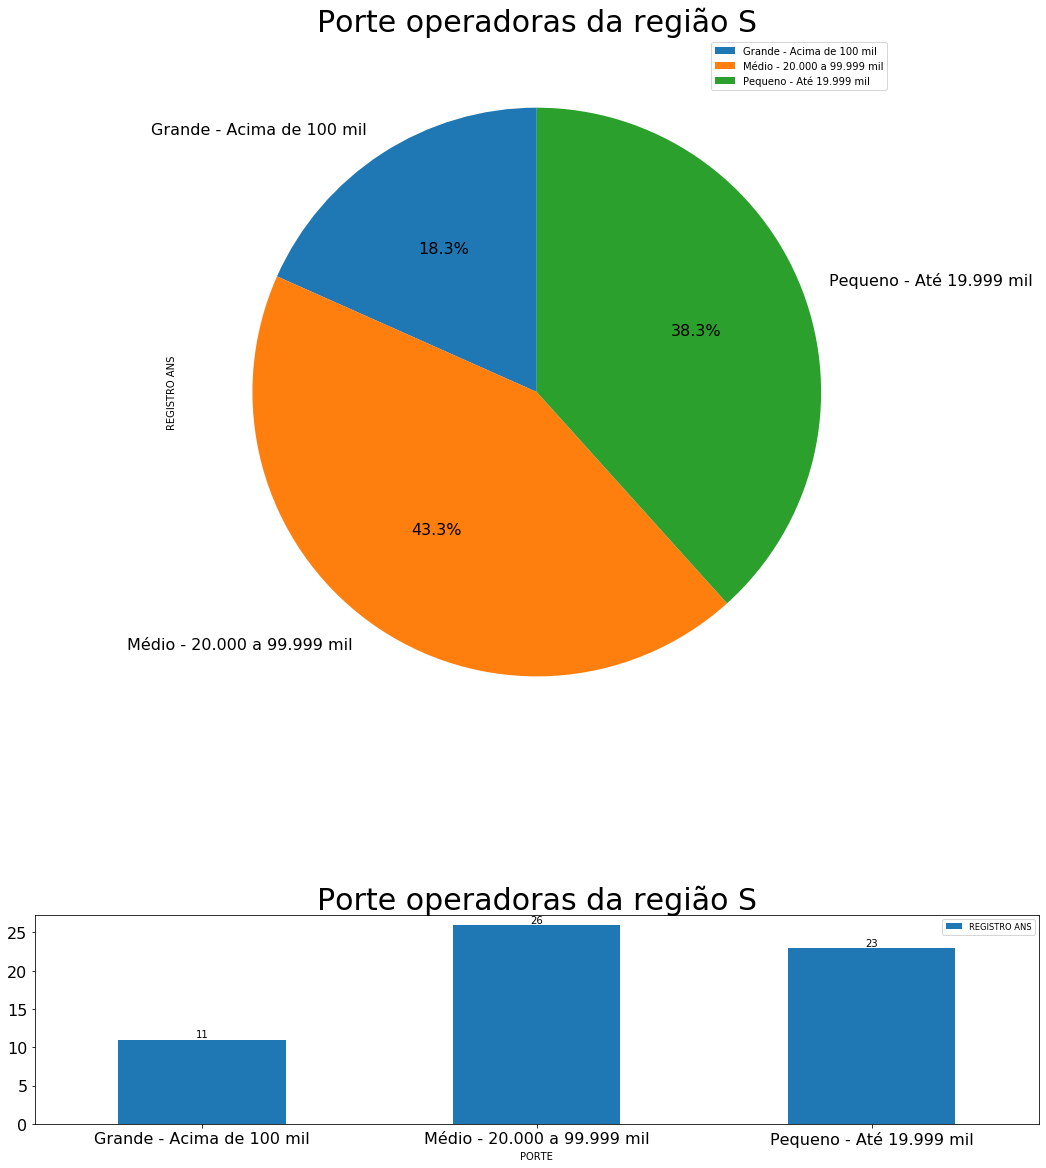

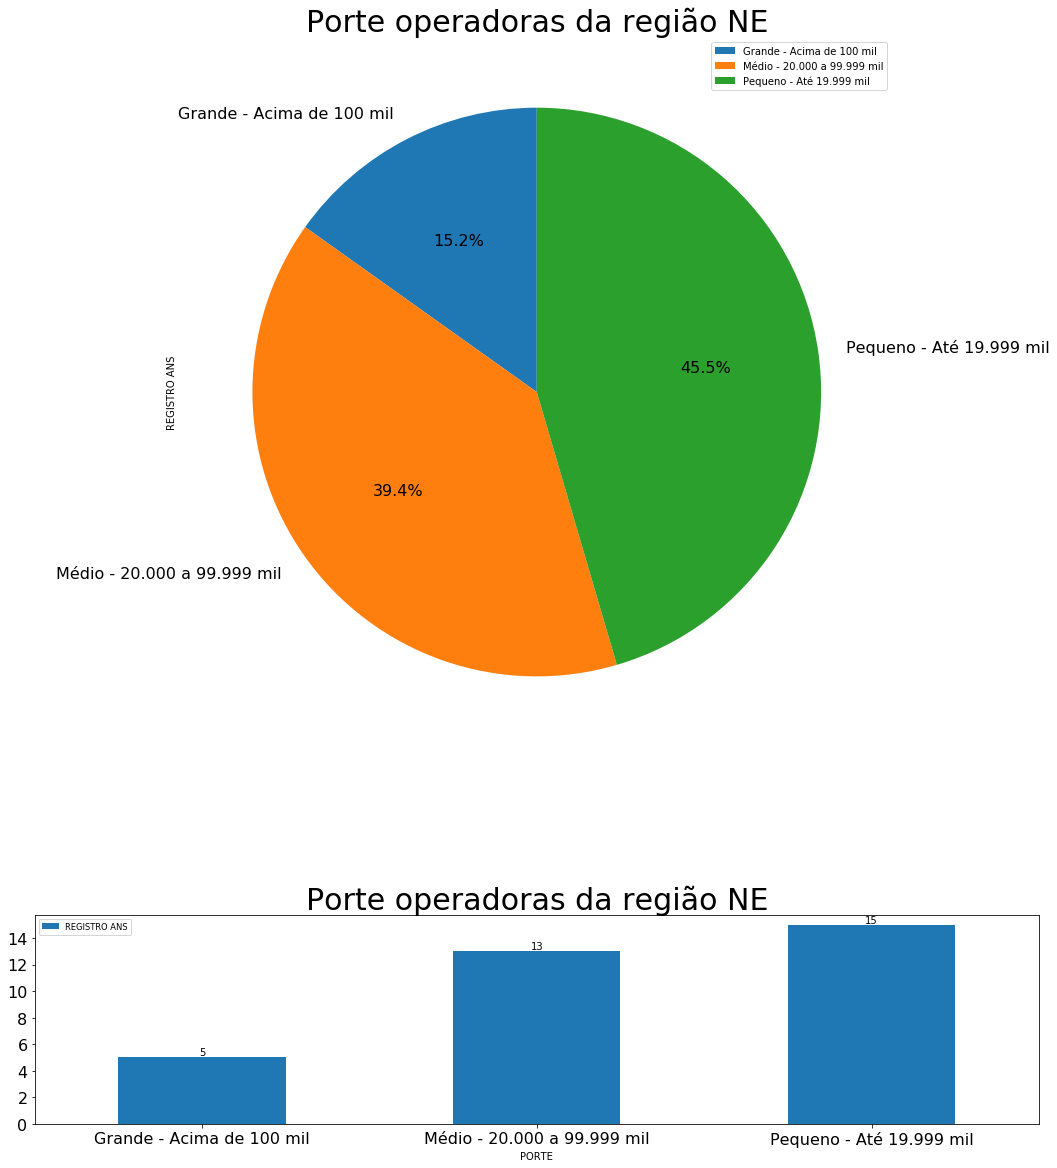

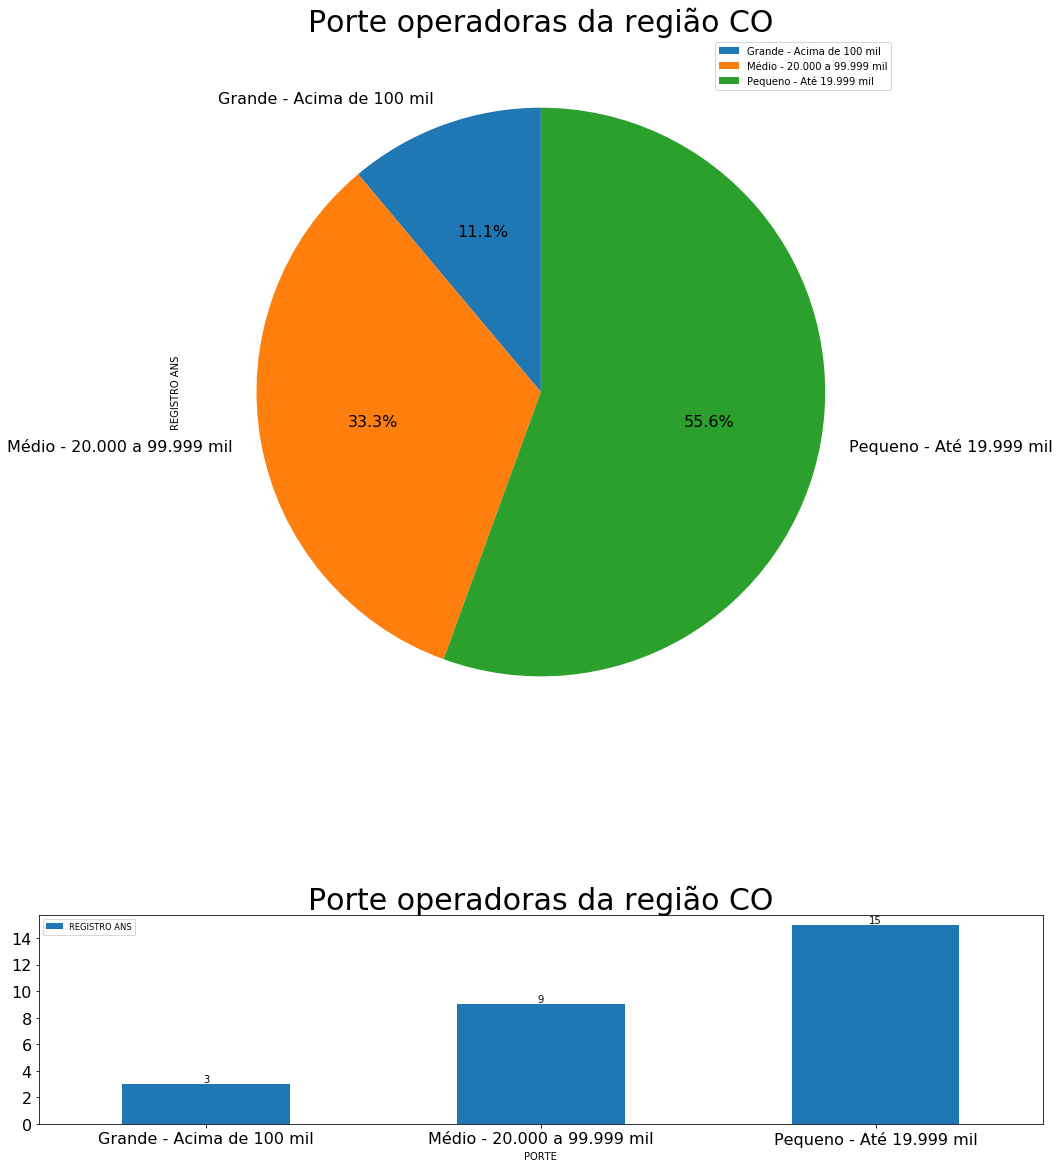

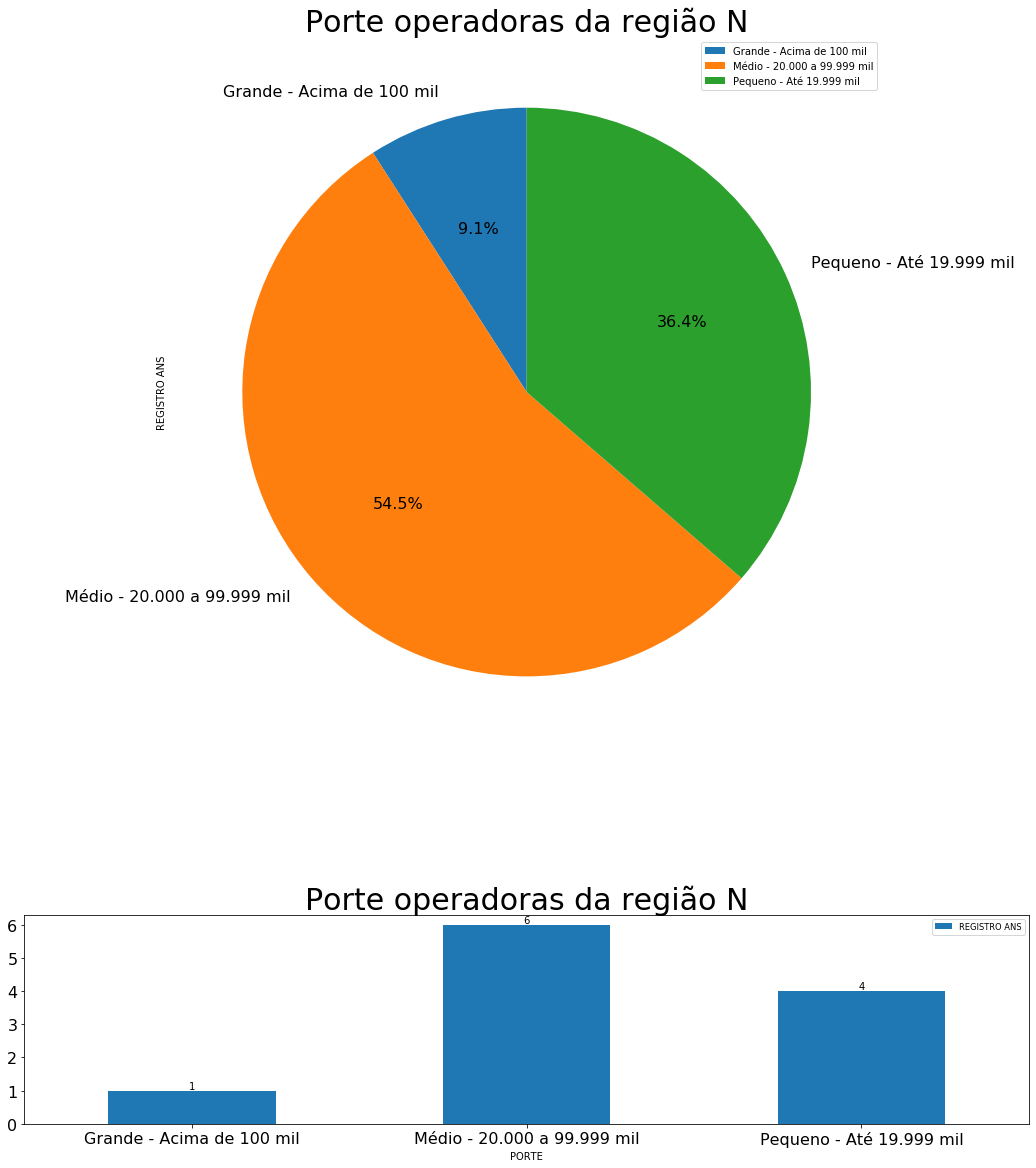

In [14]:
for regiao in df_cadu_operadoras["REGIÃO"].unique():
    serie_operadoras_por_regiao = df_cadu_operadoras[df_cadu_operadoras["REGIÃO"] == regiao].groupby(by=["PORTE"])['REGISTRO ANS'].count()
    gera_grafico_group_by(serie_operadoras_por_regiao, "Porte operadoras da região "+regiao)

## Todas as operadores por região

In [15]:
total_beneficiarios_por_ano = df_porte_operadoras.groupby(by=["ano"],as_index=False)['beneficiarios'].sum()
total_beneficiarios_por_ano.set_index("ano")
total_beneficiarios_por_ano.columns = ["ano", "total"]


In [16]:
media_beneficiarios_por_ano = df_porte_operadoras.groupby(by=["ano"],as_index=False)['beneficiarios'].mean()
media_beneficiarios_por_ano.set_index("ano")
media_beneficiarios_por_ano.columns = ["ano", "media"]
media_beneficiarios_por_ano['media'] = media_beneficiarios_por_ano['media'].map(lambda x: '%2.0f' % x).astype(float)

In [17]:
df_beneficiarios_por_ano = total_beneficiarios_por_ano.merge(media_beneficiarios_por_ano,on="ano")

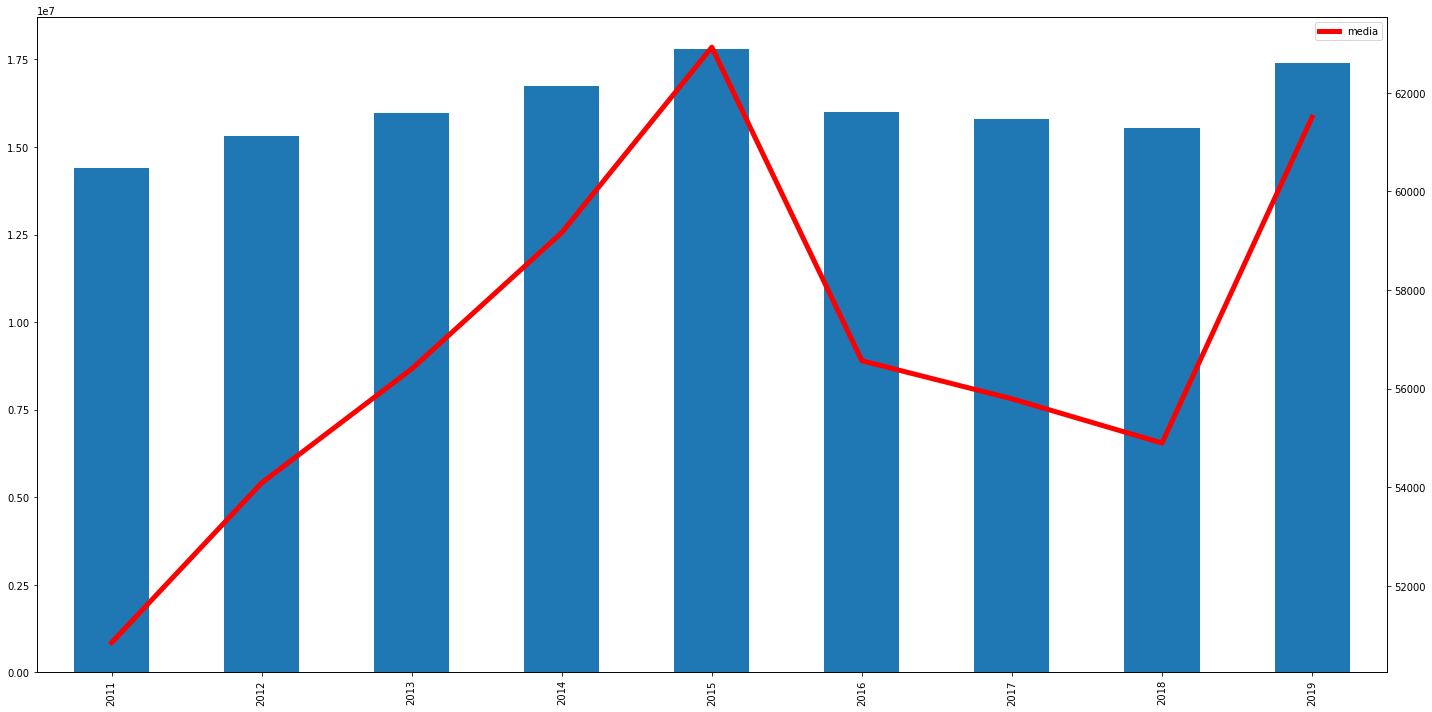

In [27]:
plt.figure(figsize=(20,10))
ax1 = df_beneficiarios_por_ano['media'].plot(secondary_y=True, color='red',linewidth=5.0)
ax2 = df_beneficiarios_por_ano['total'].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(df_beneficiarios_por_ano['ano'])

plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [28]:
df_beneficiarios_por_ano

,ano,total,media
0,2011,14389472.0,50846.0
1,2012,15306697.0,54087.0
2,2013,15961255.0,56400.0
3,2014,16744033.0,59166.0
4,2015,17808501.0,62928.0
5,2016,16007968.0,56565.0
6,2017,15789290.0,55793.0
7,2018,15535689.0,54896.0
8,2019,17406905.0,61508.0


In [19]:
def sinalizar_mudanca_porte(x):
    ano_anterior = x['ano'] - 1
    df_ano_anterior = df_porte_operadoras[(df_porte_operadoras['ano'] == ano_anterior) & (df_porte_operadoras['Registro_ANS'] == x['Registro_ANS'])].squeeze()
    variacao = "0"
    if (len(df_ano_anterior) > 0):
        porte_anterior = df_ano_anterior['porte']
        porte_atual = x['porte']
        if ((porte_anterior == "Pequeno Porte" and porte_atual in ["Médio Porte",'Grande Porte']) or  (porte_anterior == "Médio Porte" and porte_atual=='Grande Porte')):
            return  "subiu"
        elif ((porte_anterior == "Grande Porte" and porte_atual in ["Médio Porte","Pequeno Porte"]) or  (porte_anterior == "Médio Porte" and porte_atual=="Pequeno Porte")):
            return "abaixou"
        else:
            return "manteve"

In [20]:
df_porte_operadoras['variacao'] = df_porte_operadoras.apply(lambda x: sinalizar_mudanca_porte(x),axis=1)

In [21]:
df_cadu.columns

Index(['REGISTRO ANS', 'RAZÃO SOCIAL', 'TIPO DE COOPERATIVA',
       'TIPO DE ATUAÇÃO', 'GRAU DA COOPERATIVA', 'HIERARQUIA 1',
       'HIERARQUIA 2', 'HIERARQUIA 3', 'CEP', 'ESTADO', 'REGIÃO', 'LOCALIDADE',
       'CNPJ', ' DATA DA FUNDAÇÃO', ' ÁREA DE AÇÃO',
       'QUANTIDADE DE FUNCIONÁRIOS', 'COOPERADOS TOTAL',
       'QUANTIDADE DE BENEFICIÁRIOS', 'PORTE', 'STATUS', 'DATA DE INATIVAÇÃO'],
      dtype='object')

In [61]:
df_cadop.columns

Index(['Registro_ANS', 'Razao_Social', 'Nome_Fantasia', 'Regiao_de_Atuacao'], dtype='object')

In [5]:
df_demonstracoes = pd.read_csv("../entrada/todas_demonstracoes.csv",encoding="ISO-8859-1")

/home/leticia/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,38,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Operadoras insolventes por trimestre

In [7]:
df_demonstracoes[df_demonstracoes['PL'] < 0].groupby(['ANO','REG_ANS']).count()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  SEMESTRE  PEONA_SUS  \
ANO  REG_ANS                                                                  
2010 311961            1             1               1         1          1   
     322261            1             1               1         1          1   
     327689            3             3               3         3          3   
     338559            3             3               3         3          3   
     347361            4             4               4         4          4   
...                  ...           ...             ...       ...        ...   
2018 393321            3             3               3         3          3   
2019 323004            1             1               0         1          1   
     323993            2             2               0         2          2   
     363774            2             2               0         2          2   
     393321            1             1               0         1          1   

              PEONA_OUTROS  PESL_OUTROS  PESL_SUS  REMISSAO  PPCNG  ...  \
ANO  REG_ANS                                                        ...   
2010 311961              1            1         1         1      1  ...   
     322261              1            1         1         1      1  ...   
     327689              3            3         3         3      3  ...   
     338559              3            3         3         3      3  ...   
     347361              4            4         4         4      4  ...   
...                    ...          ...       ...       ...    ...  ...   
2018 393321              3            3         3         3      3  ...   
2019 323004              1            1         1         1      1  ...   
     323993              2            2         2         2      2  ...   
     363774              2            2         2         2      2  ...   
     393321              1            1         1         1      1  ...   

              DESCRICAO  VL_SALDO_FINAL  Registro_ANS  Razao_Social  \
ANO  REG_ANS                                                          
2010 311961           1               1             1             1   
     322261           1               1             1             1   
     327689           3               3             3             3   
     338559           3               3             3             3   
     347361           4               4             4             4   
...                 ...             ...           ...           ...   
2018 393321           3               3             3             3   
2019 323004           1               1             1             1   
     323993           2               2             2             2   
     363774           2               2             2             2   
     393321           1               1             1             1   

              Nome_Fantasia  Regiao_de_Atuacao  CHAVE  Unnamed: 0.1.1.1       \
ANO  REG_ANS                                                                   
2010 311961               1                  1      0                 0    0   
     322261               1                  1      0                 0    0   
     327689               3                  3      0                 0    0   
     338559               3                  3      0                 0    0   
     347361               4                  4      0                 0    0   
...                     ...                ...    ...               ...  ...   
2018 393321               3                  3      0                 1    0   
2019 323004               1                  1      1                 0    0   
     323993               2                  2      2                 0    0   
     363774               0                  2      2                 0    0   
     393321               1                  1      1                 0    0   

              DT_CARGA  
ANO  REG_ANS        